**Importing the packages**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

**Loading the Dataset**

In [18]:
df=pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


**Preprocessing**

In [19]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

**EDA(Exploratory Data Analysis)**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [21]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [22]:
cor = df.corr()
cor

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


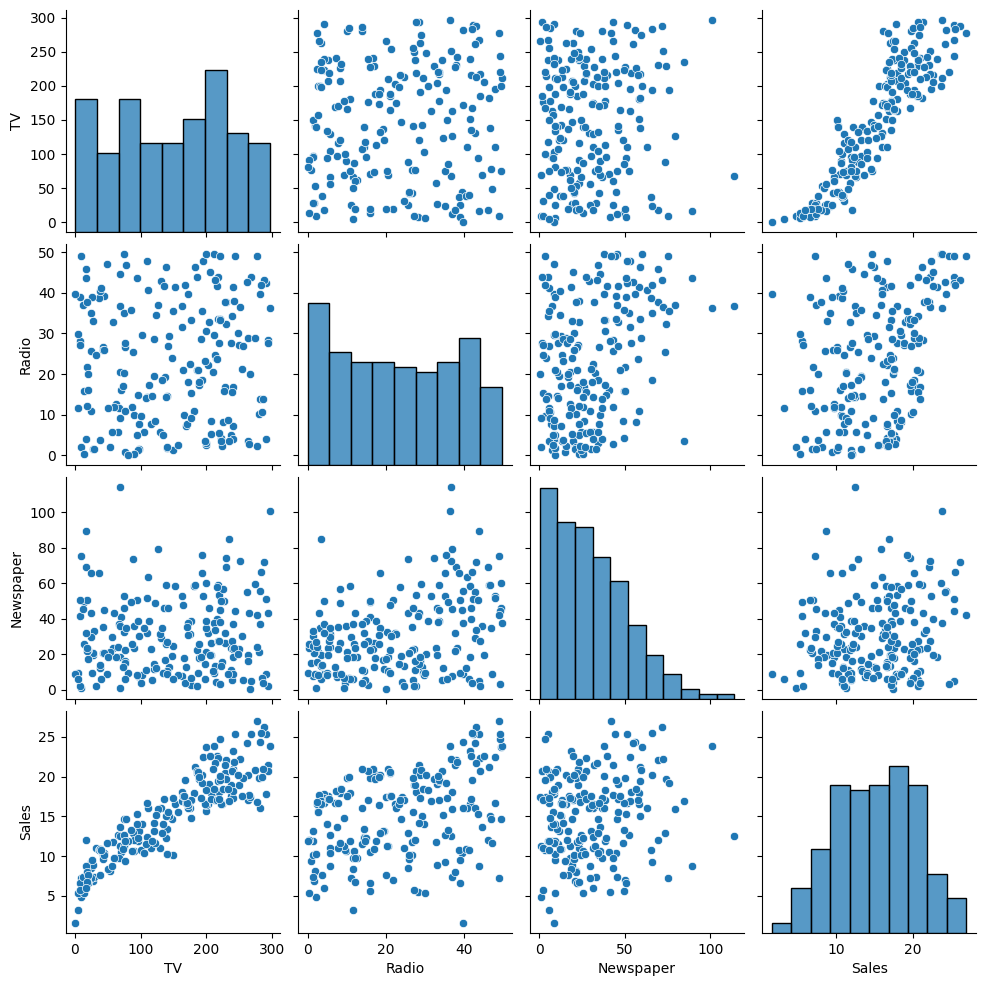

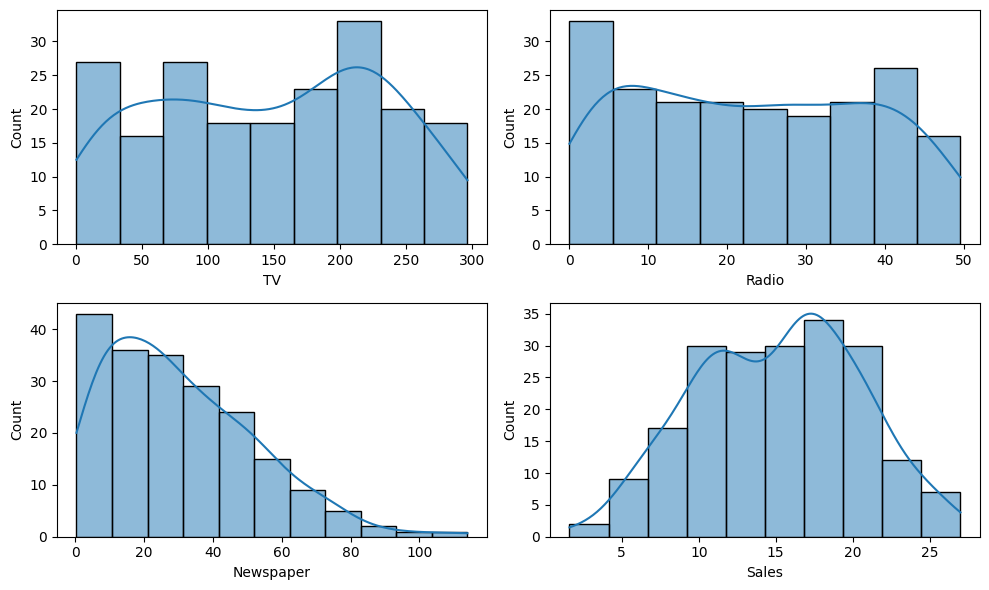

In [24]:
sns.pairplot(df)
plt.show()

# Individual feature distributions
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['TV'], kde=True)
plt.xlabel('TV')
plt.subplot(2, 2, 2)
sns.histplot(df['Radio'], kde=True)
plt.xlabel('Radio')
plt.subplot(2, 2, 3)
sns.histplot(df['Newspaper'], kde=True)
plt.xlabel('Newspaper')
plt.subplot(2, 2, 4)
sns.histplot(df['Sales'], kde=True)
plt.xlabel('Sales')
plt.tight_layout()
plt.show()

1. Sales Distribution: The histogram of the 'Sales' variable suggests that sales values are approximately normally distributed, with a peak around 10-15 units. However, there seems to be a slight skewness towards higher sales values.

2. Feature Distributions: The histograms of 'TV', 'Radio', and 'Newspaper' indicate that the distribution of advertising budgets is right-skewed, with higher values concentrated towards the right end. This suggests that higher advertising budgets are less common, and most values fall within a certain range.

3. Correlation: The correlation matrix reveals the relationships between variables. We can observe the following:

    1. TV advertising has a relatively strong positive correlation with sales (around 0.78), suggesting that higher TV ad spending is associated with higher sales.
    2. Radio advertising also shows a positive correlation with sales (around 0.58), although it is relatively weaker than TV advertising.
    3. Newspaper advertising has a weaker positive correlation with sales (around 0.23), indicating a less influential relationship.
4. Pairwise Scatter Plots: The scatter plots show the relationship between each pair of variables. By visualizing the points' distribution, we can observe trends or patterns. For example:

    1. The scatter plot between 'TV' and 'Sales' exhibits a positive linear relationship, suggesting that as TV ad spending increases, so does sales.
    2. The scatter plot between 'Radio' and 'Sales' also suggests a positive relationship, although with more scattered points compared to TV.
5. Based on these insights, we can conclude that TV advertising seems to have the strongest influence on sales, followed by radio advertising. Newspaper advertising appears to have a relatively weaker impact on sales compared to TV and radio.

In [25]:
X=df.drop("Sales",axis=1)
y=df["Sales"]

**Splitting the Data**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

**Fitting the Model** 

In [27]:
model.fit(X_train, y_train)

LinearRegression()

**Prediction**

In [28]:
y_pred = model.predict(X_test)

In [29]:
print("Predicted Sales:")
print(y_pred)

Predicted Sales:
[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]


**Accuracy**

In [30]:
accuracy = r2_score(y_test, y_pred)

print("R-squared score:", accuracy)

R-squared score: 0.9059011844150826
